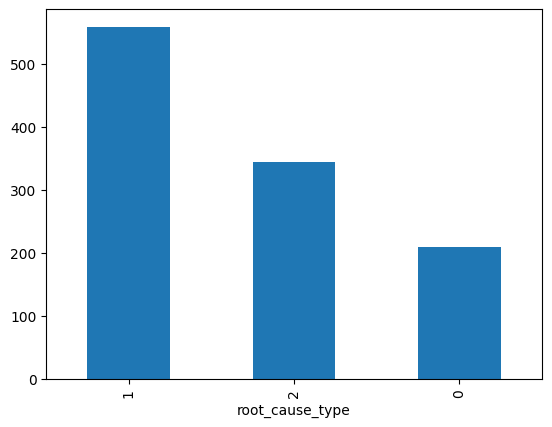

In [16]:
# 1. 데이터 로드
import pandas as pd
import matplotlib.pyplot as plt

def ppr_data(df):
    # TODO: 데이터 전처리 코드 구현 ---------- #
    df = df.groupby('ticketno').apply(custom_info).reset_index()  # ticketno 기준 병합 및 전처리 수행

    x_df = df.iloc[:, :-1]
    y_df = df['root_cause_type']
    
    y_df.value_counts().plot(kind = 'bar') if y_df[0] is not None else None  # 레이블 분포 확인
    
    # ------------------------------------- #
    return x_df, y_df

def custom_info(group):  # 임의로 작성된 전처리 코드입니다.
    d = {}
    group.sort_values(by='alarmtime', ascending=True, inplace=True)  # 경보 순서 정렬
    d['alarmmsg_original'] = ' '.join(group['alarmmsg_original'])  # 메시지 단순 병합
    if 'root_cause_type' in group.columns:  # 레이블 추출
        group['root_cause_type'] = group['root_cause_type'].apply(lambda x: 0 if x == 'PowerFail' else (1 if x == 'LinkCut' else 2))  # 레이블 인코딩
        d['root_cause_type'] = group['root_cause_type'].iloc[0]  # 동일한 ticketno는 동일한 root_cause_type을 가짐
    else:
        d['root_cause_type'] = None  # 테스트 세트의 경우 정답 컬럼 없음
    return pd.Series(d, index=['alarmmsg_original', 'root_cause_type'])

train_df = pd.read_csv("Q2_train.csv")
test_df = pd.read_csv("Q2_test.csv")

x_train_df, y_train_df = ppr_data(train_df)
x_test_df, _ = ppr_data(test_df)  # 테스트 세트의 경우 정답 컬럼 없음

# print(x_train_df,'\n', y_train_df)
# print(x_test_df)

In [15]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
import torch
import numpy as np

model = 'model.pt'

# 2. 모델 학습 및 예측
class MyModel:
    def __init__(self) -> None:
        self.model = model

    def train(self, x_train, y_train):
        x_alarmmsg_original = x_train['alarmmsg_original'].values
        y_root_cause_type = y_train['root_cause_type'].values
        max_len = len(max(x_alarmmsg_original, key=len))
        print('max_len:', max_len)

        input_ids = []
        attention_masks = []

        print('------------------------------ tokenizing end ------------------------------\n')

        
        print('------------------------------ train end ------------------------------\n')

        pass

    def predict(self, x_test):
        pred_df = pd.DataFrame(columns=['alarmmsg_original', 'root_cause_type'])
        print('------------------------------ predict end ------------------------------\n')

        return pred_df

model = MyModel()
model.train(x_train_df, y_train_df)
y_pred = model.predict(x_test_df)

NameError: name 'x_train_df' is not defined

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

x_alarmmsg_original = x_train_df['alarmmsg_original'].tolist()

def make_count_vector_df(x_alarmmsg_original):
    CV_model = CountVectorizer(
        ngram_range=(1,2), 
        min_df = 1,
        max_df = 2,
        binary = False
    )
    cv_result = CV_model.fit_transform(x_alarmmsg_original)
    print("CV_model.vocabulary_: {}".format(CV_model.vocabulary_))
    return pd.DataFrame(cv_result.toarray(),
             columns = [it[0] for it in sorted(CV_model.vocabulary_.items(), key=lambda x: x[1])])
print(make_count_vector_df(x_alarmmsg_original))

CV_model.vocabulary_: {'fan': 13, '48v': 0, 'fan 48v': 14, '48v fail': 1, 'fail fan': 10, 'fan fail': 15, 'fail 48v': 8, 'protectionswitched dcc': 42, 'restarted': 54, 'os_mismatch': 38, 'booting restarted': 6, 'restarted booting': 55, 'booting os_mismatch': 5, 'os_mismatch os_mismatch': 40, 'os_mismatch booting': 39, 'booting unit': 7, 'los unit': 30, 'portshutdown': 41, 'remove portshutdown': 51, 'lof booting': 23, 'autonego_mismatch autonego_mismatch': 2, 'remove dcc': 48, 'ipc': 16, 'remove unit': 53, 'unit ipc': 59, 'ipc fail': 17, 'psu rem': 43, 'rem psu': 46, 'opt mis': 37, 'remove trk': 52, 'mis dcc': 34, 'traffic psu': 58, 'booting dcc': 4, 'fail booting': 9, 'rmt_fail': 56, 'pw rmt_fail': 44, 'mis eth': 35, 'remove lsp': 50, 'lof opt': 25, 'los tdm': 29, 'lof dcc': 24, 'mis lsp': 36, 'traffic opt': 57, 'loc trk': 22, 'los ql_fail': 28, 'fail ql_fail': 11, 'low dcc': 32, 'low autonego_mismatch': 31, 'ql_fail lsp': 45, 'low trk': 33, 'remove booting': 47, 'link_fail_manual': 18

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
def make_tfidf_df(x_alarmmsg_original):
    TFIDFmodel = TfidfVectorizer(
        ngram_range=(1,1), # 앞 뒤 window를 고려하여 확장된 형태로 제시해줌. phrase를 뽑아낼 수 있는 강점이 있기는 할듯. 
        min_df = 1, # document freqeuency 가 1 이상은 되는 키워드만으로 vocabulary를 구성
        max_df = 10,# document frequency가 10 이하인 키워드만으로 vocabulary를 구성 
        binary = False # binary이면 있다 없다 구조로 변경됨
    )
    TFIDFmodel.fit(x_alarmmsg_original)
    #print(TFIDFmodel.vocabulary_)
    return pd.DataFrame(TFIDFmodel.transform(x_alarmmsg_original).toarray(),
             columns = [it[0] for it in sorted(TFIDFmodel.vocabulary_.items(), key=lambda x: x[1])])
x_alarmmsg_original = ["I am a dog"]
print( make_tfidf_df(x_alarmmsg_original) )

         am       dog
0  0.707107  0.707107


In [1]:
import torch
print(torch.__version__)

2.0.1+cu118


In [8]:
print(torch.cuda.is_available())

True


In [6]:
import cupy as cp
import numpy as np

print("Cupy Version: ", cp.__version__)
cp.cuda.Device(0).use()

Cupy Version:  12.2.0


<CUDA Device 0>

In [ ]:
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt

f, axes = plt.subplots(2, 2, sharex=False, sharey=False)
f.set_size_inches((16, 6)) 
for i in range(0, 2):
    for j in range(0, 2):
        sample_n = [1, 1000, 2000, 6000][i*2+j]
        x_alarmmsg_original = x_alarmmsg_original*sample_n
        sent_split_lst = map(lambda s: list(s.lower().split(" ")), x_alarmmsg_original)

        model = Word2Vec(list(sent_split_lst), vector_size=2, window = 3, min_count=1)
        model.init_sims(replace=True)

        for x, y, t in ((model.wv.get_vector(w)[0], model.wv.get_vector(w)[0], w) for w in model.wv.index_to_key):
            axes[i][j].scatter(x, y, cmap=plt.cm.rainbow)
            axes[i][j].text(x+0.01, y, t, fontsize=12)
            axes[i][j].set_title("sample size = {}".format(sample_n))
f.tight_layout()
plt.savefig('./word_embedding_subplot_20180515.svg')
plt.show()

In [4]:
# 3. 결과 제출
# 본 코드는 제출되는 파일의 형태에 대한 가이드로, 반드시 아래 구조를 따를 필요 없이 자유롭게 코드를 작성해도 무방합니다.
# 제출 포맷에 대해선 data/Q2_label_sample.csv를 참조하세요.
#
# 분야 2의 경우, 전표(ticket) 하나에 하나의 근원장애(root_cause_type)을 매칭해야 합니다.
#   주의: 경보(alarm) 개수와 전표(ticket) 개수는 다르며, 예측할 대상은 전표입니다.
#   주의: ticketno 컬럼 기준으로 오름차순 정렬이 필요합니다.
# 분야 2의 제출 파일은 2개 컬럼 [ticketno, root_cause_type]을 가져야 합니다.

def submitResult(pred):
    try:
        label = pd.read_csv('Q2_label_sample.csv')
        # ticketno 순서와 개수가 일치하는지 확인
        if (label['ticketno'] == pred['ticketno']).all():
            print("Check: ticketno 순서와 샘플 수가 일치합니다.")
        else:
            print("Warning: 테스트 세트와 모델 예측의 ticketno가 일치하지 않습니다.")
            return

        pred.to_csv('Q2_submitResult.csv', index=False)
        print("Done : Q2_submitResult.csv 파일로 저장되었습니다.")
    except Exception as e:
        # 예외가 발생한 경우 오류 메시지 출력
        print("Error:", e)

submitResult(y_pred)

Check: ticketno 순서와 샘플 수가 일치합니다.
Done : Q2_submitResult.csv 파일로 저장되었습니다.


In [5]:
# GPU reset

from numba import cuda

device = cuda.get_current_device(); device.reset()